In [215]:
#@markdown ## 1. Imports
#@markdown ### Run this cell twice
try:
  import networkx as nx
  import osmnx as ox
  import requests
  import matplotlib.cm as cm
  import matplotlib.colors as colors
  import matplotlib.pyplot as plt
  from matplotlib.lines import Line2D
  from geopy.geocoders import Nominatim
  import PIL
  from PIL import Image, ImageFont, ImageDraw, ImageOps, ImageColor
  import ipywidgets as widgets
  from math import ceil
  !git clone https://github.com/manukivela/manus-maps


  print(f"The NetworkX package is version {nx.__version__}")
  print(f"The OSMNX package is version {ox.__version__}")
  print(f"The Request package is version {requests.__version__}")
  print(f"The PIL package is version {PIL.__version__}")

  geolocator = Nominatim(user_agent="manun-karttaohjelma")


except:
  !pip install osmnx
  !pip -y uninstall matplotlib
  !pip install matplotlib==3.1.3
  print('Stopping RUNTIME! Please run again.')
  import os
  os.kill(os.getpid(), 9)



Cloning into 'manus-maps'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.
The NetworkX package is version 2.6.3
The OSMNX package is version 1.1.2
The Request package is version 2.28.1
The PIL package is version 7.1.2


## 2. Themes, theme creation tool and styles 


In [221]:
#@markdown Themes hide here
themes = {1 : 
          {"color3" : "#d40a47",
          "color2" : "#e78119",
          "color1" : "#30bab0",
          "color4" : "#bbbbbb",
          "color5" : "#ffffff",
           "background" : "#061529",
           "text" : "#ffffff"},


          2 : 
          {"color1" : "#fe4a49",
          "color2" : "#2ab7ca",
          "color3" : "#fed766",
          "color4" : "#e6e6ea",
          "color5" : "#f4f4f8",
           "background" : "#061529",
           "text" : "#FCFBF4"},


          3 : 
          {"color1" : "#eee3e7",
          "color2" : "#ead5dc",
          "color3" : "#eec9d2",
          "color4" : "#f4b6c2",
          "color5" : "#f6abb6",
           "background" : "#061529",
           "text" : "#FCFBF4"},
          
          4 :
          {"color1" : "#a6a6a6",
          "color2" : "#676767",
          "color3" : "#454545",
          "color4" : "#bdbdbd",
          "color5" : "#d5d5d5",
           "background" : "#061529",
           "text" : "#FCFBF4"},
          
          5 : 
          {"color1" : "#7029ac",
          "color2" : "#8c53bc",
          "color3" : "#a97ecd",
          "color4" : "#be9ed9",
          "color5" : "#bbb9e3",
           "background" : "#061529",
           "text" : "#FCFBF4"},
          6 :
          {'background' : '#34714D',
          'text' : '#FCFBF4',
          'color1' : '#A85639',
          'color2' : '#AB7739',
          'color3' : '#AF9A39',
          'color4' : '#A5B239',
          'color5' : '#85B539'},
          7 :
          {'background' : '#1E322A',
          'text' : '#FCFBF4',
          'color1' : '#386051',
          'color2' : '#457864',
          'color3' : '#519078',
          'color4' : '#5FA68B',
          'color5' : '#2B493D'},
          8 :
          {'background' : '#0a0322',
          'text' : '#fefcdd',
          'color1' : '#fff76b',
          'color2' : '#fffc41',
          'color3' : '#f5ec00',
          'color4' : '#c4bc00',
          'color5' : '#fff995'},
          9 :
          {'background' : '#ffe1ff',
          'text' : '#000000',
          'color1' : '#444444',
          'color2' : '#2d2e2e',
          'color3' : '#333434',
          'color4' : '#191919',
          'color5' : '#232323'},
          10 :
          {'background' : '#061529',
          'text' : '#FFEFEF',
          'color1' : '#FFFF41',
          'color2' : '#008018',
          'color3' : '#0000F9',
          'color4' : '#86007D',
          'color5' : '#FFA52C'},

}

In [200]:
#@markdown Styles hide here

styles = {
    1:
    {'line1' : 0.10,
     'line2' : 0.15,
     'line3' : 0.25,
     'line4' : 0.35,
     'line5' : 0.45,
     'line6' : 0.5,
     },
    2:
    {'line1' : 0.10*2,
     'line2' : 0.15*2,
     'line3' : 0.25*2,
     'line4' : 0.35*2,
     'line5' : 0.45*2,
     'line6' : 0.5*2,
     },
    3:
    {'line1' : 0.10*3,
     'line2' : 0.15*3,
     'line3' : 0.25*3,
     'line4' : 0.35*3,
     'line5' : 0.45*3,
     'line6' : 0.5*3,
     },
    4:
    {'line1' : 0.10*10,
     'line2' : 0.15*10,
     'line3' : 0.25*10,
     'line4' : 0.35*10,
     'line5' : 0.45*10,
     'line6' : 0.5*10,
     },
    5:
    {'line1' : 0.10*20,
     'line2' : 0.15*20,
     'line3' : 0.25*20,
     'line4' : 0.35*20,
     'line5' : 0.45*20,
     'line6' : 0.5*20,
     },

}

pride_colors = ["#FF0018","#FFA52C","#FFFF41","#008018","#0000F9","#86007D"]

In [2]:
#@markdown ## Select colors for new theme

def make_color_palette(colors):
  print((len(themes)+1),":")
  print("{'background' : '" + colors[0] + "',")
  print("'text' : '" + colors[6] + "',")
  print("'color1' : '" + colors[2] + "',")
  print("'color2' : '" + colors[3] + "',")
  print("'color3' : '" + colors[4] + "',")
  print("'color4' : '" + colors[5] + "',")
  print("'color5' : '" + colors[1] + "'},")
  


color_picker1 = widgets.ColorPicker(
    concise=False, description='Background', value='#FFFFFF', disabled=False
)
color_picker2 = widgets.ColorPicker(
    concise=False, description='Text', value='#FFFFFF', disabled=False
)
color_picker3 = widgets.ColorPicker(
    concise=False, description='Color 1', value='#FFFFFF', disabled=False
)
color_picker4 = widgets.ColorPicker(
    concise=False, description='Color 2', value='#FFFFFF', disabled=False
)
color_picker5 = widgets.ColorPicker(
    concise=False, description='Color 3', value='#FFFFFF', disabled=False
)
color_picker6 = widgets.ColorPicker(
    concise=False, description='Color 4', value='#FFFFFF', disabled=False
)
color_picker7 = widgets.ColorPicker(
    concise=False, description='Color 5', value='#FFFFFF', disabled=False
)
display(color_picker1)
display(color_picker2)
display(color_picker3)
display(color_picker4)
display(color_picker5)
display(color_picker6)
display(color_picker7)

ColorPicker(value='#FFFFFF', description='Background')

ColorPicker(value='#FFFFFF', description='Text')

ColorPicker(value='#FFFFFF', description='Color 1')

ColorPicker(value='#FFFFFF', description='Color 2')

ColorPicker(value='#FFFFFF', description='Color 3')

ColorPicker(value='#FFFFFF', description='Color 4')

ColorPicker(value='#FFFFFF', description='Color 5')

In [192]:
#@markdown ## Run this to make the theme




background_hex = color_picker1.value
text_hex = color_picker2.value
color_hex1 = color_picker3.value
color_hex2 = color_picker4.value
color_hex3 = color_picker5.value
color_hex4 = color_picker6.value
color_hex5 = color_picker7.value





colors_list = [
background_hex,
color_hex1,
color_hex2,
color_hex3,
color_hex4,
color_hex5,
text_hex,]

make_color_palette(colors_list)



10 :
{'background' : '#001e57',
'text' : '#FF0018',
'color1' : '#FFFF41',
'color2' : '#008018',
'color3' : '#0000F9',
'color4' : '#86007D',
'color5' : '#FFA52C'},


## 3. Settings

Theme 1 / Style 1


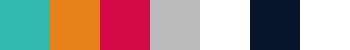

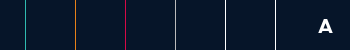

Theme 2 / Style 2


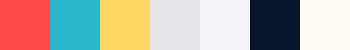

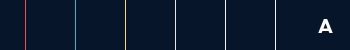

Theme 3 / Style 3


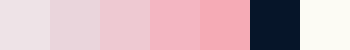

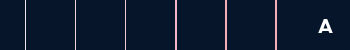

Theme 4 / Style 4


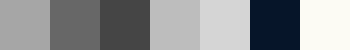

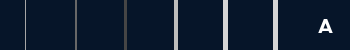

Theme 5 / Style 5


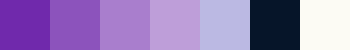

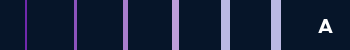

Theme 6 / Style 4


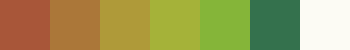

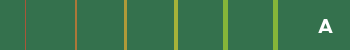

Theme 7 / Style 4


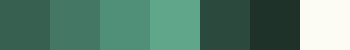

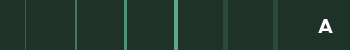

Theme 8 / Style 4


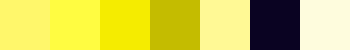

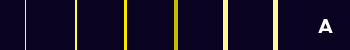

Theme 9 / Style 4


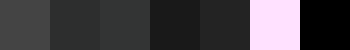

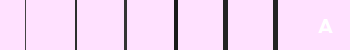

Theme 10 / Style 4


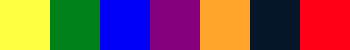

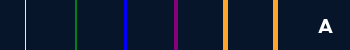

In [216]:
#@markdown ## All available themes
from math import ceil

for i in range(1, len(themes)+1):
  chosen_theme_ = i
  chosen_style_ =  i
  try:
    line1_ = styles[chosen_style_].get('line1')
    line2_ = styles[chosen_style_].get('line2')
    line3_ = styles[chosen_style_].get('line3')
    line4_ = styles[chosen_style_].get('line4')
    line5_ = styles[chosen_style_].get('line5')
    line6_ = styles[chosen_style_].get('line6')
  except:
    chosen_style_ = 4
    line1_ = styles[chosen_style_].get('line1')
    line2_ = styles[chosen_style_].get('line2')
    line3_ = styles[chosen_style_].get('line3')
    line4_ = styles[chosen_style_].get('line4')
    line5_ = styles[chosen_style_].get('line5')
    line6_ = styles[chosen_style_].get('line6')
  
  color1_ = themes[chosen_theme_].get('color1')
  color2_ = themes[chosen_theme_].get('color2')
  color3_ = themes[chosen_theme_].get('color3')
  color4_ = themes[chosen_theme_].get('color4')
  color5_ = themes[chosen_theme_].get('color5')
  bgcolor_ = themes[chosen_theme_].get('background')
  txtcolor_ = themes[chosen_theme_].get('text')

  palette = Image.new(mode="RGBA", 
                    size=(350, 50), 
                    color=txtcolor_
                    )

  palette1 = Image.new(mode="RGBA", 
                    size=(50, 50), 
                    color=color1_
                    )
  palette2 = Image.new(mode="RGBA", 
                    size=(50, 50), 
                    color=color2_
                    )
  palette3 = Image.new(mode="RGBA", 
                    size=(50, 50), 
                    color=color3_
                    )
  palette4 = Image.new(mode="RGBA", 
                    size=(50, 50), 
                    color=color4_
                    )
  palette5 = Image.new(mode="RGBA", 
                    size=(50, 50), 
                    color=color5_
                    )
  palette6 = Image.new(mode="RGBA", 
                    size=(50, 50), 
                    color=bgcolor_
                    )
  
  
  linebox = Image.new(mode="RGBA", 
                  size=(350, 50), 
                  color=bgcolor_
                  )
  draw = ImageDraw.Draw(linebox)
  draw.line((25, 0, 25, 50), fill=color1_, width=ceil(line1_))
  draw.line((75, 0, 75, 50), fill=color2_, width=ceil(line2_))
  draw.line((125, 0, 125, 50), fill=color3_, width=ceil(line3_))
  draw.line((175, 0, 175, 50), fill=color4_, width=ceil(line4_))
  draw.line((225, 0, 225, 50), fill=color5_, width=ceil(line5_))
  draw.line((275, 0, 275, 50), fill=color5_, width=ceil(line6_))
  box_font = ImageFont.truetype('/content/manus-maps/fonts/Metropolis-Bold.otf', 20)
  draw.text((318, 17), "A", font=box_font)


  palette.paste(palette1, (0,0))
  palette.paste(palette2, (50,0))
  palette.paste(palette3, (100,0))
  palette.paste(palette4, (150,0))
  palette.paste(palette5, (200,0))
  palette.paste(palette6, (250,0))


  print('Theme', chosen_theme_, "/ Style", chosen_style_)
  display(palette, linebox)

In [137]:
#@markdown ---

#@markdown ### Address you want in the center of the image
user_address = "Bermudankatu" #@param{type:"string"}
user_housenumber = "5" #@param{type:"string"}
user_city = "Helsinki" #@param{type:"string"}
user_postalnumber = "" #@param{type:"string"}
user_country = "" #@param{type:"string"}
#@markdown ---
use_custom_text = True #@param{type:"boolean"}
#@markdown > Turn on if you want different title. Default is user_city.

user_custom_text = "J\xE4tk\xE4saari" #@param{type:"string"}
#@markdown ---

#@markdown ### Distance from address in meters
user_distance =  2000#@param {type:"integer"}
distance_type = "network" #@param['bbox', 'network']
#@markdown bbox = Square around the center point

#@markdown network = Only connected roads

#@markdown ---
show_waterways = False #@param {type:"boolean"}
highlight_homestreet = False #@param {type:"boolean"}
#@markdown > Highlight homestreet with thicker line and custom color. Will display color picker after running.

if highlight_homestreet:
  highlight_color = widgets.ColorPicker(
      concise=True, description='Highlight', value='yellow', disabled=False
  )
  display(highlight_color)

location = geolocator.geocode(f'{user_address} {user_housenumber} {user_city} {user_postalnumber} {user_country}')

while True:
  try:
    latitude = location.latitude
    longitude = location.longitude
    break
  except:
    print("Couldn't find address. Trying without house number.")
    location = geolocator.geocode(f'{user_address} {user_city} {user_country}')
center_point = (latitude, longitude)

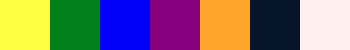

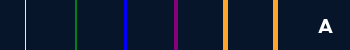

In [223]:

chosen_theme =  10#@param {type:"integer"}
if chosen_theme > len(themes):
  print(f"Choose theme between 1-{len(themes)}")
  chosen_theme =  1
chosen_style =  4#@param {type:"integer"}
if chosen_style > len(styles):
  print(f"Choose style between 1-{len(styles)}")
  chosen_style =  1



color1 = themes[chosen_theme].get('color1')
color2 = themes[chosen_theme].get('color2')
color3 = themes[chosen_theme].get('color3')
color4 = themes[chosen_theme].get('color4')
color5 = themes[chosen_theme].get('color5')
bgcolor = themes[chosen_theme].get('background')
txtcolor = themes[chosen_theme].get('text')

palette = Image.new(mode="RGBA", 
                   size=(350, 50), 
                   color=txtcolor
                   )

palette1 = Image.new(mode="RGBA", 
                   size=(50, 50), 
                   color=color1
                   )
palette2 = Image.new(mode="RGBA", 
                   size=(50, 50), 
                   color=color2
                   )
palette3 = Image.new(mode="RGBA", 
                   size=(50, 50), 
                   color=color3
                   )
palette4 = Image.new(mode="RGBA", 
                   size=(50, 50), 
                   color=color4
                   )
palette5 = Image.new(mode="RGBA", 
                   size=(50, 50), 
                   color=color5
                   )
palette6 = Image.new(mode="RGBA", 
                   size=(50, 50), 
                   color=bgcolor
                   )




line1 = styles[chosen_style].get('line1')
line2 = styles[chosen_style].get('line2')
line3 = styles[chosen_style].get('line3')
line4 = styles[chosen_style].get('line4')
line5 = styles[chosen_style].get('line5')
line6 = styles[chosen_style].get('line6')

linebox = Image.new(mode="RGBA", 
                size=(350, 50), 
                color=bgcolor
                )
draw = ImageDraw.Draw(linebox)
draw.line((25, 0, 25, 50), fill=color1, width=ceil(line1))
draw.line((75, 0, 75, 50), fill=color2, width=ceil(line2))
draw.line((125, 0, 125, 50), fill=color3, width=ceil(line3))
draw.line((175, 0, 175, 50), fill=color4, width=ceil(line4))
draw.line((225, 0, 225, 50), fill=color5, width=ceil(line5))
draw.line((275, 0, 275, 50), fill=color5, width=ceil(line6))
box_font = ImageFont.truetype('/content/fonts/Metropolis-Bold.otf', 20)
draw.text((318, 17), "A", font=box_font)

palette.paste(palette1, (0,0))
palette.paste(palette2, (50,0))
palette.paste(palette3, (100,0))
palette.paste(palette4, (150,0))
palette.paste(palette5, (200,0))
palette.paste(palette6, (250,0))

display(palette, linebox)

## 4. Draw the maps

In [139]:
#@markdown ## Get the roads

G = ox.graph_from_point(center_point, dist=user_distance, dist_type=distance_type, retain_all=True, simplify = True, network_type='all')


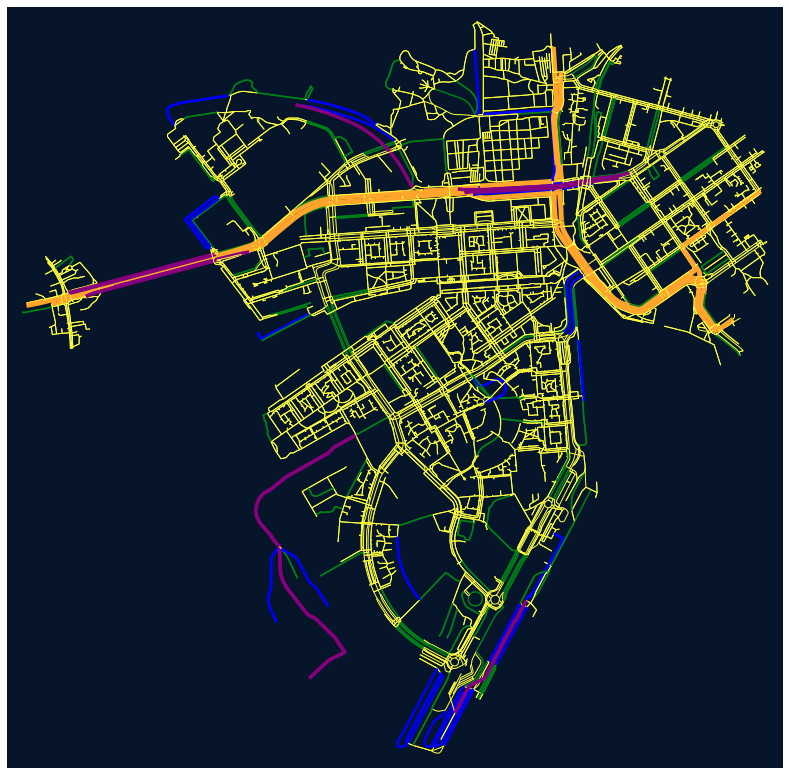

In [217]:
#@markdown ## Make the map
figsize = (14,14)
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    

roadColors = []
roadWidths = []

for item in data:



    if "length" in item.keys():


        if item["length"] <= 100:
            linewidth = line1
            color = color1
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = line2
            color = color2
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = line3
            color = color3
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = color4
            linewidth = line4
        else:
            color = color4
            linewidth = line5

        if "primary" in item["highway"]:
            linewidth = line6
            color = color5



    else:
        color = color1
        linewidth = line1
        
            
    roadColors.append(color)
    roadWidths.append(linewidth)



  
# Bbox sides
north = latitude + 0.035
south = latitude - 0.035
east = longitude + 0.035
west = longitude - 0.035

# Make Map
fig, ax = ox.plot_graph(G, node_size=0, figsize=figsize, 
                        #bbox = (north, south, east, west),
                        dpi = 300,  bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)




# Save figure
fig.savefig("map.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)

In [218]:
#@markdown ## Highlight home street
if highlight_homestreet:
  try:

    u = []
    v = []
    key = []
    data = []
    for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
        u.append(uu)
        v.append(vv)
        key.append(kkey)
        data.append(ddata)    


    # List to store colors
    roadColors = []
    roadWidths = []


    for i in data:
      if "length" in i.keys():
        if user_address.capitalize() in i.values():
            color = highlight_color.value
            linewidth = line6*2
        else:
          linewidth = 0


          
      roadColors.append(color)    
      roadWidths.append(linewidth)

    fig, ax = ox.plot_graph(G, node_size=0, figsize=figsize, 
                            #bbox = (north, south, east, west),
                            dpi = 300,  bgcolor = "#061529",
                            save = False, edge_color=roadColors,
                            edge_linewidth=roadWidths, edge_alpha=1)

    fig.savefig("homestreet.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)
  except:
    print("Couldn't highlight homestreet")
    highlight_homestreet = False

In [89]:
#@markdown ## Create waterways

if show_waterways:
  try:
    G1 = ox.graph_from_point(center_point, dist=user_distance, dist_type='bbox', network_type='all', 
                            simplify=True, retain_all=True, truncate_by_edge=False, 
                            clean_periphery=False, custom_filter='["natural"~"water"]')

    G2 = ox.graph_from_point(center_point, dist=user_distance, dist_type='bbox', network_type='all', 
                            simplify=True, retain_all=True, truncate_by_edge=False, 
                            clean_periphery=False, custom_filter='["waterway"~"river"]')

    Gwater = nx.compose(G1, G2)

    u = []
    v = []
    key = []
    data = []
    for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
        u.append(uu)
        v.append(vv)
        key.append(kkey)
        data.append(ddata)    


    # List to store colors
    roadColors = []
    roadWidths = []

    # #72b1b1
    # #5dc1b9
    for item in data:
        if "name" in item.keys():
            if item["length"] > 400: 
                color = "#72b1b1"
                linewidth = 1
            else:
                color = "#72b1b1"
                linewidth = 0.25
        else:
            color = "#72b1b1"
            linewidth = 0.5
            
        roadColors.append(color)    
        roadWidths.append(linewidth)

    fig, ax = ox.plot_graph(Gwater, node_size=0, figsize=figsize, 
                            #bbox = (north, south, east, west),
                            dpi = 300,  bgcolor = "#061529",
                            save = False, edge_color=roadColors,
                            edge_linewidth=roadWidths, edge_alpha=1)

    fig.savefig("water.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)
  except:
    print("Couldn't add water")
    show_water = False

## 5. Make the poster

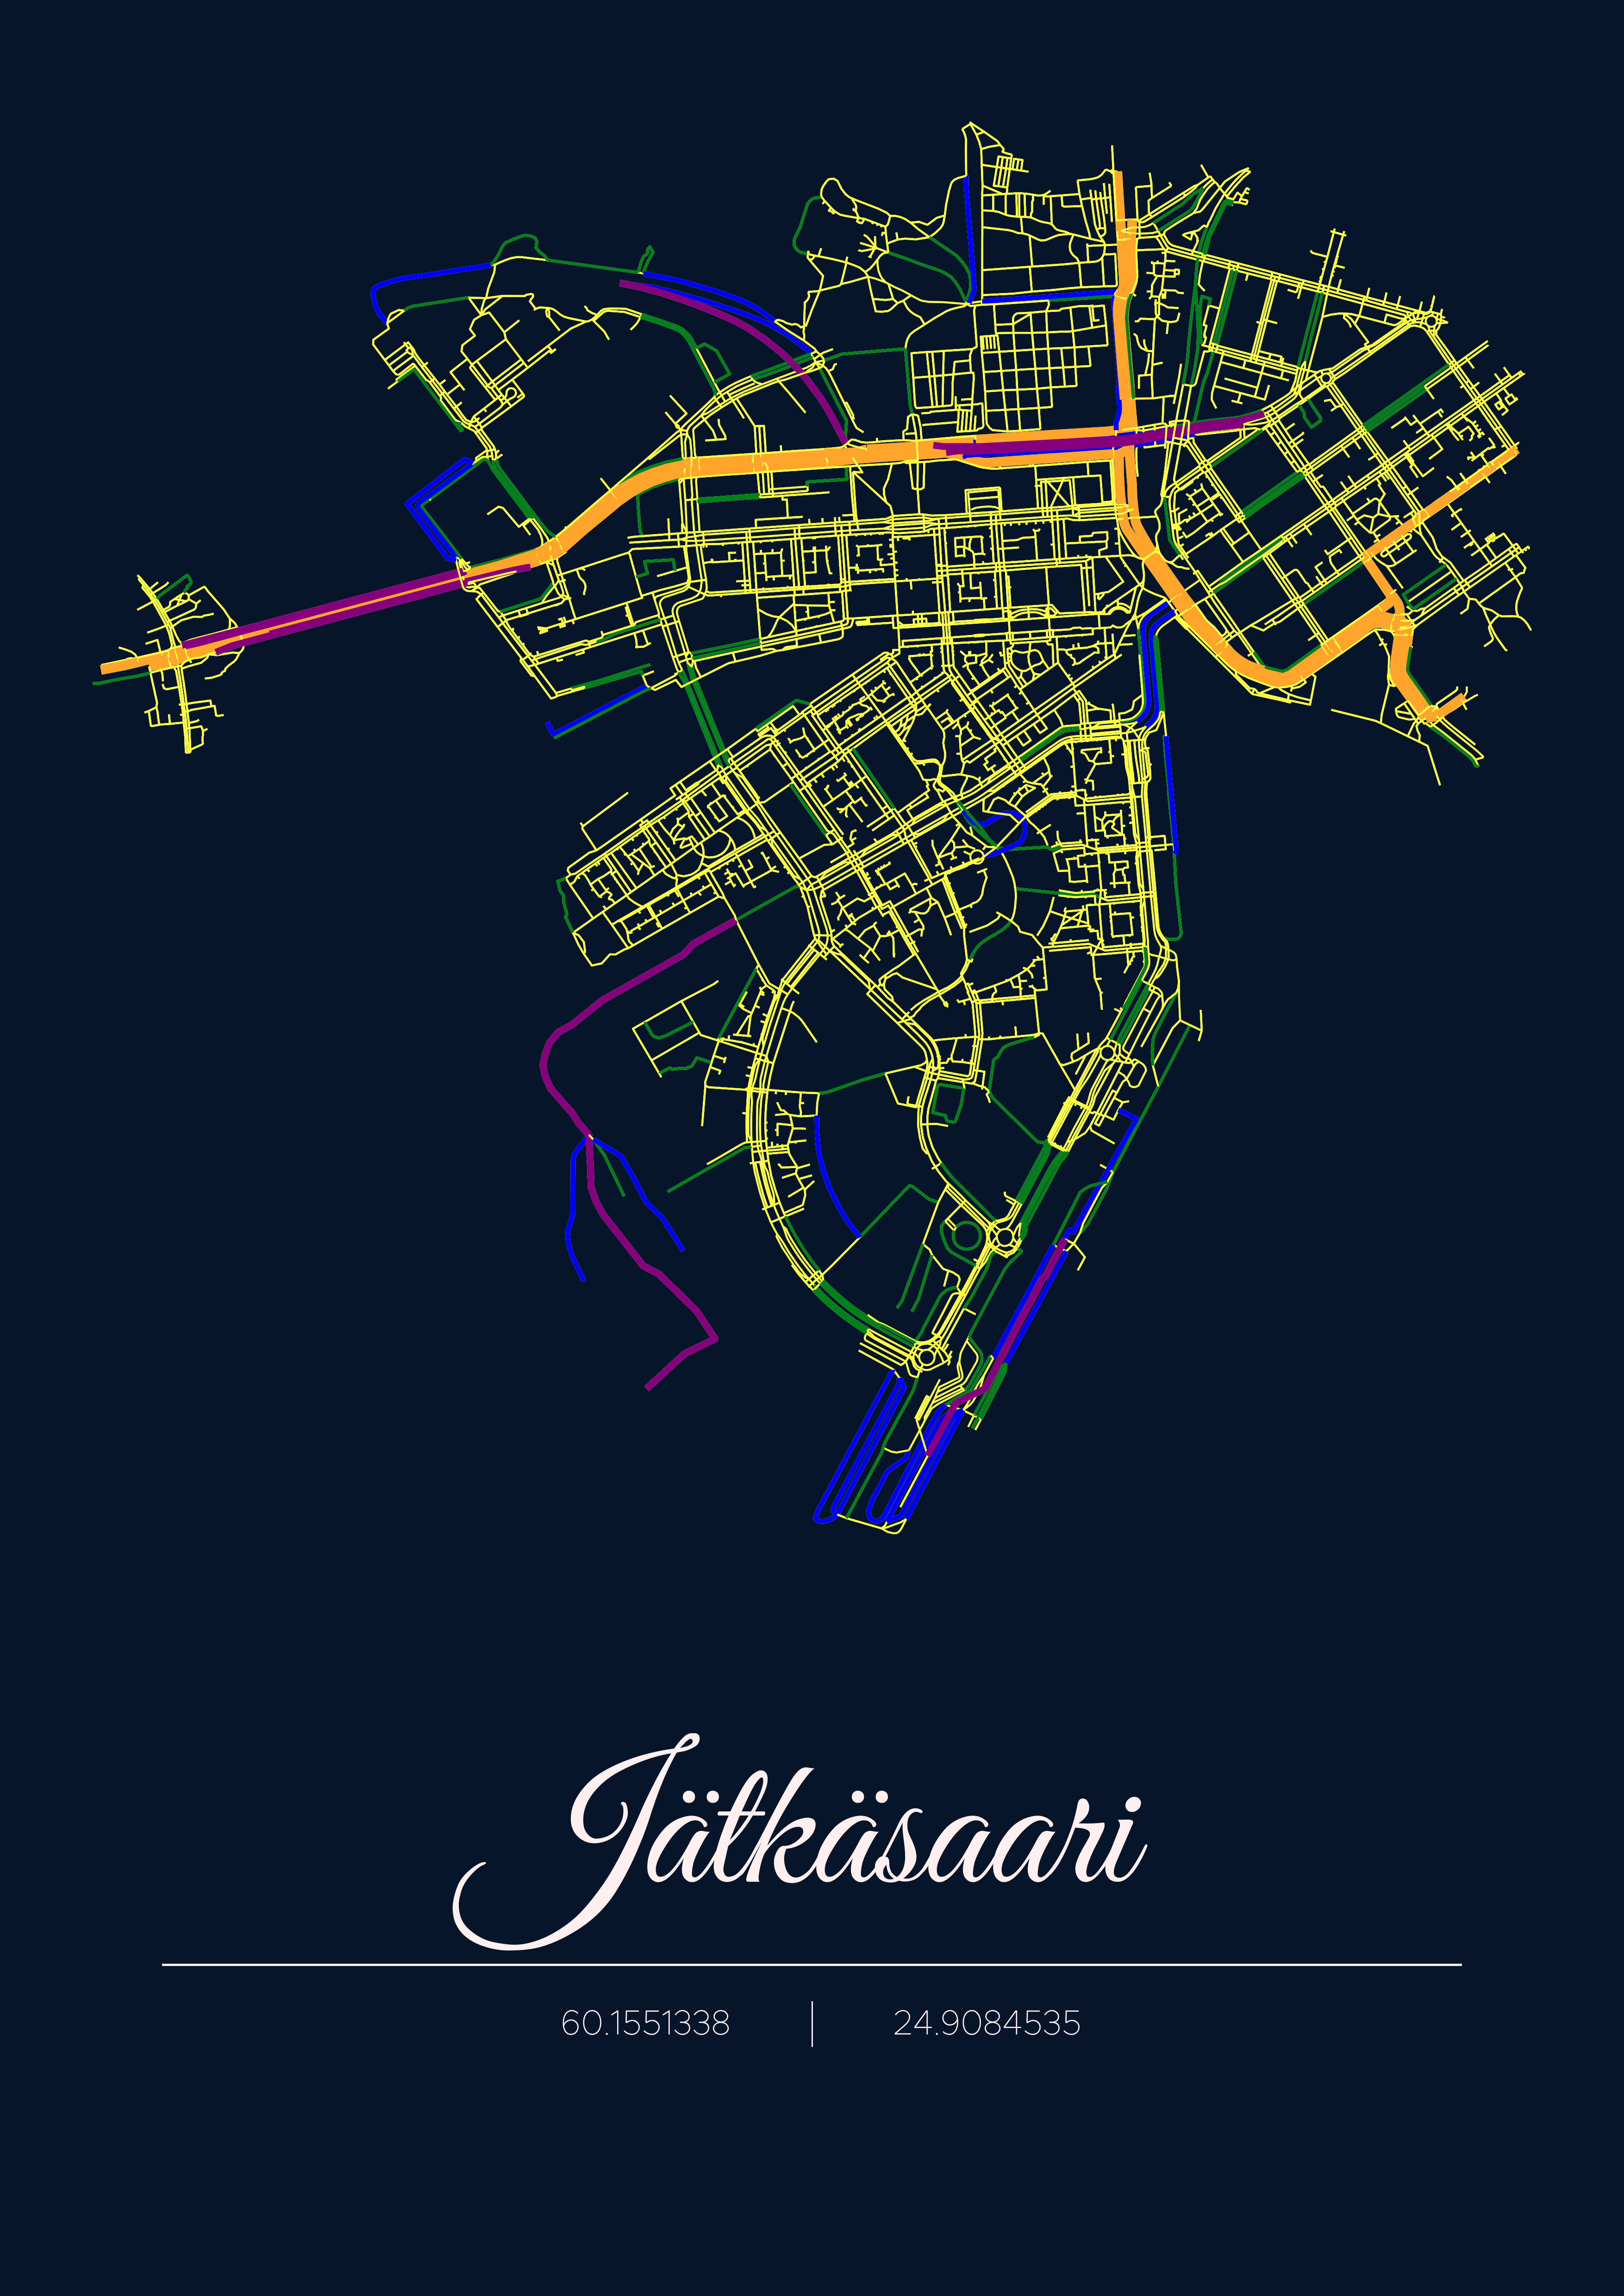

In [224]:
#@markdown ## Enjoy
pride = False
canvas = Image.new(mode="RGBA", 
                   size=(3508, 4961), 
                   color=bgcolor
                   )

map = Image.open("/content/map.png")


W, H = canvas.size
w, h = map.size
offset = ((W - w) // 2, int((H - h) // 10))

if pride:
  alpha = map.getchannel('A')
  map = Image.open('/content/Gay_Pride_Flag.png').convert('RGB').rotate(0).resize((w,h))
  map.putalpha(alpha)

canvas.paste(map, offset, map)
if show_waterways:
  water = Image.open("/content/water.png")
  canvas.paste(water, offset, water)

if highlight_homestreet:
  homestreet = Image.open("/content/homestreet.png")
  canvas.paste(homestreet, offset, homestreet)



title_font = ImageFont.truetype('/content/fonts/GreatVibes-Regular.ttf', 400)
if use_custom_text:
  title_text = f'{user_custom_text}'
else:
  title_text = f"{user_city}".capitalize()
sub_font = ImageFont.truetype('/content/fonts/Metropolis-Thin.otf', 75)
I1 = ImageDraw.Draw(canvas)

# Title/city
w, h = I1.textsize(title_text, title_font)
I1.text(((W-w)/2,(H-h)/1.2), title_text, txtcolor, font=title_font)


I1.line((W*0.1,H-((H-h)*0.16), W-(W*0.1),H-((H-h)*0.16)), fill=txtcolor, width=5)

# Latitude
w, h = I1.textsize(str(latitude), sub_font)
I1.text((W/2-W*0.05-w,(H-h)/1.13), str(latitude), txtcolor, font=sub_font)

# Longitude
w, h = I1.textsize(str(longitude), sub_font)
I1.text((W/2+W*0.05, (H-h)/1.13), str(longitude), txtcolor, font=sub_font)


I1.line((W/2, H-((H-h)*0.11),(W/2, H-((H-h)*0.13))), fill=txtcolor, width=3)

canvas